In [46]:
# =====================================
# Title: Anomaly Detection using Autoencoder on Credit Card Dataset
# =====================================

# a. Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# =====================================
# b. Upload / Access the Dataset
# =====================================

# Load dataset (update file path)
path = r"C:\Users\\OneDrive\Desktop\DL\DLDataset\creditcard.csv"
df = pd.read_csv(path)

# Display dataset info
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [47]:
# Separate features and label
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Normalize the numerical features (Amount + PCA components)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test (80% - 20%)
x_train, x_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


Training shape: (227845, 29)
Testing shape: (56962, 29)


In [48]:

# =====================================
# c. Encoder converts input to latent representation
# =====================================

encoder = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),  # 29 input features after dropping 'Time' and 'Class'
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')  # Latent representation (compressed data)
])

# =====================================
# d. Decoder converts latent vector back to original input
# =====================================

decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Output same size as input
])

# Combine Encoder + Decoder into Autoencoder
autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)           │ (None, 8)                   │           4,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_19 (Sequential)           │ (None, 29)                  │           4,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,349 (36.52 KB)

 Trainable params: 9,349 (36.52 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:

# =====================================
# e. Compile the Model
# =====================================

autoencoder.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# =====================================
# f. Train the Model
# =====================================

history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, x_test),
    shuffle=True,
    verbose=2
)

Epoch 1/10
1781/1781 - 17s - 10ms/step - loss: 0.5878 - mae: 0.5093 - val_loss: 0.4392 - val_mae: 0.4520
Epoch 2/10
1781/1781 - 20s - 11ms/step - loss: 0.4038 - mae: 0.4371 - val_loss: 0.3721 - val_mae: 0.4216
Epoch 3/10
1781/1781 - 11s - 6ms/step - loss: 0.3591 - mae: 0.4124 - val_loss: 0.3470 - val_mae: 0.4036
Epoch 4/10
1781/1781 - 10s - 6ms/step - loss: 0.3386 - mae: 0.3993 - val_loss: 0.3272 - val_mae: 0.3936
Epoch 5/10
1781/1781 - 9s - 5ms/step - loss: 0.3266 - mae: 0.3913 - val_loss: 0.3169 - val_mae: 0.3873
Epoch 6/10
1781/1781 - 11s - 6ms/step - loss: 0.3165 - mae: 0.3847 - val_loss: 0.3076 - val_mae: 0.3809
Epoch 7/10
1781/1781 - 11s - 6ms/step - loss: 0.3049 - mae: 0.3776 - val_loss: 0.2999 - val_mae: 0.3758
Epoch 8/10
1781/1781 - 11s - 6ms/step - loss: 0.2974 - mae: 0.3725 - val_loss: 0.2922 - val_mae: 0.3701
Epoch 9/10
1781/1781 - 11s - 6ms/step - loss: 0.2935 - mae: 0.3688 - val_loss: 0.3113 - val_mae: 0.3883
Epoch 10/10
1781/1781 - 11s - 6ms/step - loss: 0.2868 - mae: 0.

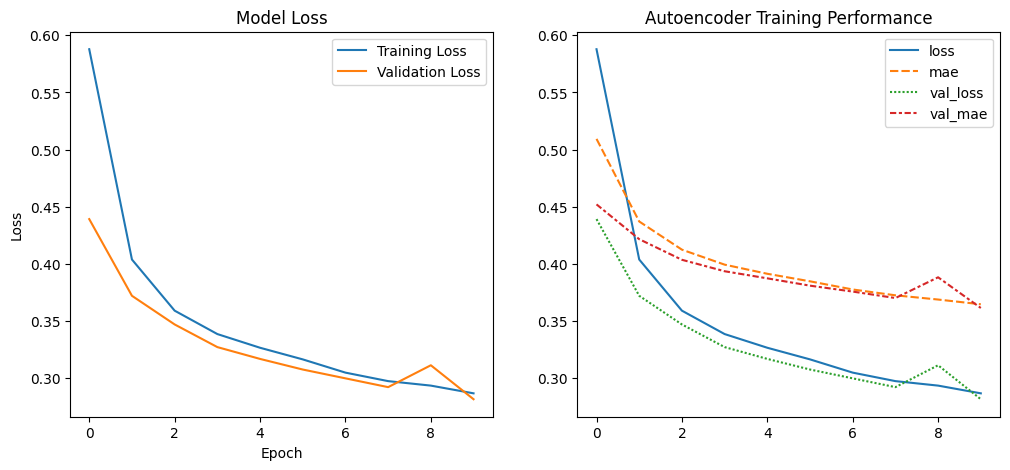

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

Reconstruction Error Threshold: 0.824890
Number of anomalies detected: 2849


In [50]:
# =====================================
# g. Plot Training Curves
# =====================================

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=history.history)
plt.title("Autoencoder Training Performance")
plt.show()

# =====================================
# h. Detecting Anomalies
# =====================================

# Reconstruct test data
predictions = autoencoder.predict(x_test)

# Compute reconstruction error (MSE)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

# Set threshold for anomaly detection
threshold = np.percentile(mse, 95)
print(f"\nReconstruction Error Threshold: {threshold:.6f}")

# Detect anomalies
anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")


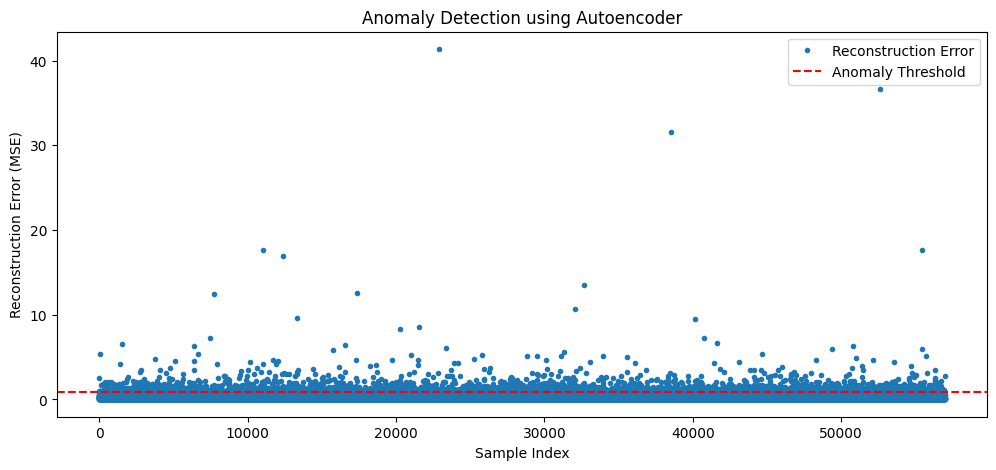

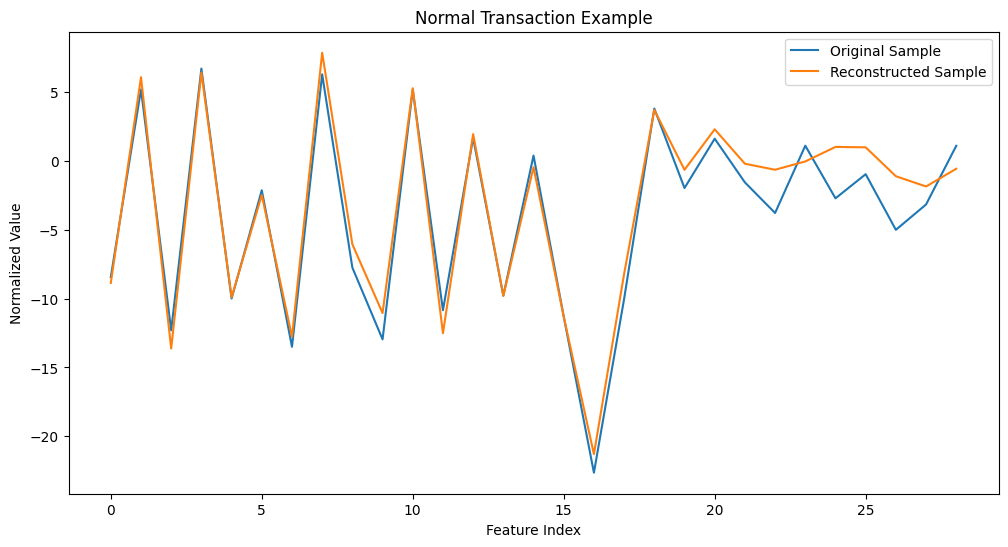

In [51]:

# =====================================
# i. Visualize Anomaly Results
# =====================================

plt.figure(figsize=(12, 5))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='Reconstruction Error')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title("Anomaly Detection using Autoencoder")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.legend()
plt.show()

# =====================================
# j. Example Comparison (Original vs Reconstructed)
# =====================================

plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original Sample')
plt.plot(predictions[0], label='Reconstructed Sample')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Value')
plt.title('Normal Transaction Example')
plt.legend()
plt.show()

